In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt

0
Lastencodermulti_inf_100.pt


[]

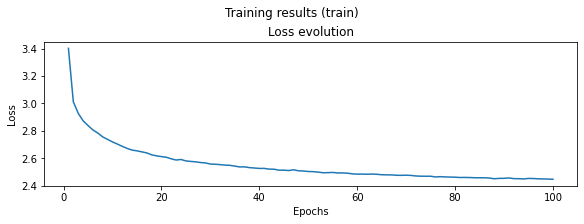

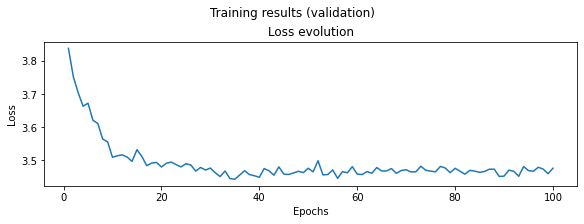

In [7]:
state_dirs = "Lastencodermulti_inf_100.pt"
NAME = "single_VR_50"
n_curves = 1
states = []
for i in range(n_curves):
    print(i)
    print(state_dirs)
    awa = torch.load(state_dirs)
    states.append(torch.load(state_dirs))

fig, (train_loss) = plt.subplots(ncols = 1, figsize = (8,3), layout = "constrained")
fig.suptitle("Training results (train)")
for i, state in enumerate(states):
    n_epochs = np.arange(1,len(state["loss"][0]) + 1, 1)
    train_loss.plot(n_epochs , state["loss"][0], )
    # train_acc.plot(n_epochs , state["acc"][0], label = labels[i]),

train_loss.set_xlabel("Epochs")
train_loss.set_ylabel("Loss")
train_loss.set_title("Loss evolution")

# train_acc.set_xlabel("Epochs"),
# train_acc.set_ylabel("Acc"),
# train_acc.set_title("Accuracy evolution"),

# plt.legend(fontsize = "x-small")
plt.plot()
plt.savefig(f"{NAME}_train.png",dpi = 300)

fig, (val_loss) = plt.subplots(ncols = 1, figsize = (8,3), layout = "constrained")
fig.suptitle("Training results (validation)")

for i, state in enumerate(states):
    n_epochs = np.arange(1,len(state["loss"][0]) + 1 ,1)
    val_loss.plot(n_epochs , state["loss"][1],)
    # val_acc.plot(n_epochs , state["acc"][1], label = labels[i]),

val_loss.set_xlabel("Epochs")
val_loss.set_ylabel("Loss")
val_loss.set_title("Loss evolution")

# val_acc.set_xlabel("Epochs"),
# val_acc.set_ylabel("Acc"),
# val_acc.set_title("Accuracy evolution"),

# plt.legend(fontsize = "x-small")
plt.plot() 
# plt.savefig(f"{NAME}_val.png",dpi = 300)